In [ ]:
is_colab = 'google.colab' in str(get_ipython())
if is_colab:
    !pip install neuron
    !git clone https://github.com/davidfague/Neural-Modeling.git -b cleanup
    %cd Neural-Modeling/scripts
    !pip install neuron_reduce
    !pip install ipympl

In [ ]:
import sys
sys.path.append("../")
sys.path.append("../Modules/")

from Modules.simulation import Simulation
from Modules.cell_builder import SkeletonCell, CellBuilder
from Modules.constants import HayParameters

import os
from neuron import h

from logger import Logger # type: ignore

import numpy as np

In [ ]:
sim = Simulation(SkeletonCell.Hay)
parameters = HayParameters(sim_name = 'test', h_tstop= 5000, all_synapses_off=False)

In [ ]:
%ls

In [ ]:
try:
    os.system("rm -r x86_64/")
except:
    pass

In [ ]:
%cd ../scripts

In [ ]:
os.system(f"nrnivmodl {sim.cell_type.value['modfiles']} > /dev/null 2>&1")

h.load_file('stdrun.hoc')
h.nrn_load_dll('./x86_64/.libs/libnrnmech.so')

In [ ]:
%matplotlib widget

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interactive, fixed, FloatSlider

# Setup a global reference for figure and axes
fig, ax = None, None

def plot_segments(seg_data, elevation=0, azimuth=-100, radius_scale=1.0, deleted_indices=[]):
    global fig, ax
    if fig is None or ax is None:
        plt.close('all')  # Close any existing plots
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    else:
        ax.cla()  # Clear the existing axes

    for i, seg in enumerate(seg_data):
        x_points = [seg.coords['p0_0'].iloc[0], seg.coords['pc_0'].iloc[0], seg.coords['p1_0'].iloc[0]]
        y_points = [seg.coords['p0_1'].iloc[0], seg.coords['pc_1'].iloc[0], seg.coords['p1_1'].iloc[0]]
        z_points = [seg.coords['p0_2'].iloc[0], seg.coords['pc_2'].iloc[0], seg.coords['p1_2'].iloc[0]]

        radius = seg.coords['r'].iloc[0] * radius_scale
        color = 'red' if i in deleted_indices else 'black'
        radius = radius*0.1 if i in deleted_indices else radius # can adjust multiplier to increase red radius
        ax.plot(x_points, z_points, y_points, linewidth=radius, color=color)

    ax.view_init(elev=elevation, azim=azimuth)
    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')

In [ ]:
os.mkdir(sim.path)
parameters.path = os.path.join(sim.path, parameters.sim_name)

In [ ]:
os.mkdir(parameters.path)

In [ ]:
logger = Logger(None)
cell_builder = CellBuilder(sim.cell_type, parameters, logger)

In [ ]:
from Modules.morph_reduction_utils import get_reduced_cell

In [13]:
complex_cell, _ = cell_builder.build_cell()
reduced_cell_tufts, original_seg_data, all_deleted_seg_indices = get_reduced_cell(cell_builder, reduce_tufts = True, reduce_obliques = False)
reduced_cell_obliques, original_seg_data, all_deleted_seg_indices = get_reduced_cell(cell_builder, reduce_tufts = False, reduce_obliques = True)
reduced_cell_basals, original_seg_data, all_deleted_seg_indices = get_reduced_cell(cell_builder, reduce_basals = True)
# reduced_cell_tufts_basals, original_seg_data, all_deleted_seg_indices = get_reduced_cell(cell_builder, reduce_tufts = True, reduce_basals = True, reduce_obliques = False)
reduced_cell_tufts_basals_obliques, original_seg_data, all_deleted_seg_indices = get_reduced_cell(cell_builder, reduce_tufts = True, reduce_basals = True, reduce_obliques = True)
# reduced_cell_tufts_obliques, original_seg_data, all_deleted_seg_indices = get_reduced_cell(cell_builder, reduce_tufts = True, reduce_basals = False, reduce_obliques = True)
# reduced_cell_basals_obliques, original_seg_data, all_deleted_seg_indices = get_reduced_cell(cell_builder, reduce_tufts = False, reduce_basals = True, reduce_obliques = True)

cells = {
    'Complex':complex_cell,
    'Reduced Tufts':reduced_cell_tufts,
    'Reduced Basals':reduced_cell_basals,
    'Reduced Obliques':reduced_cell_obliques,
    # 'Reduced Tufts and Basals':reduced_cell_tufts_basals,
    # 'Reduced Tufts and Obliques':reduced_cell_tufts_obliques,
    # 'Reduced Basals and Obliques':reduced_cell_basals_obliques,
    'Reduced Tufts, Basals, Obliques': reduced_cell_tufts_basals_obliques
}

(2024-05-21 09:26:04.427259)-[PID: 150281]–[INFO]: Assigning inhibitory spike trains.
(2024-05-21 09:26:33.075226)-[PID: 150281]–[INFO]: Assigning soma spike trains.
(2024-05-21 09:26:35.157747)-[PID: 150281]–[INFO]: Finished creating a CellModel object.
(2024-05-21 09:26:35.157802)-[PID: 150281]–[INFO]: Finish building in 209.94315361976624
(2024-05-21 09:26:35.158652)-[PID: 150281]–[INFO]: Building SkeletonCell.Hay.
all: [L5PCtemplate[1].soma[0], L5PCtemplate[1].dend[0], L5PCtemplate[1].dend[1], L5PCtemplate[1].dend[2], L5PCtemplate[1].dend[3], L5PCtemplate[1].dend[4], L5PCtemplate[1].dend[5], L5PCtemplate[1].dend[6], L5PCtemplate[1].dend[7], L5PCtemplate[1].dend[8], L5PCtemplate[1].dend[9], L5PCtemplate[1].dend[10], L5PCtemplate[1].dend[11], L5PCtemplate[1].dend[12], L5PCtemplate[1].dend[13], L5PCtemplate[1].dend[14], L5PCtemplate[1].dend[15], L5PCtemplate[1].dend[16], L5PCtemplate[1].dend[17], L5PCtemplate[1].dend[18], L5PCtemplate[1].dend[19], L5PCtemplate[1].dend[20], L5PCtemplat

There is no segment to segment copy, it means that some segments in thereduced model did not receive channels from the original cell.Trying to compensate by copying channels from neighboring segments


(2024-05-21 09:41:37.914477)-[PID: 150281]–[INFO]: Building SkeletonCell.Hay.
all: [L5PCtemplate[4].soma[0], L5PCtemplate[4].dend[0], L5PCtemplate[4].dend[1], L5PCtemplate[4].dend[2], L5PCtemplate[4].dend[3], L5PCtemplate[4].dend[4], L5PCtemplate[4].dend[5], L5PCtemplate[4].dend[6], L5PCtemplate[4].dend[7], L5PCtemplate[4].dend[8], L5PCtemplate[4].dend[9], L5PCtemplate[4].dend[10], L5PCtemplate[4].dend[11], L5PCtemplate[4].dend[12], L5PCtemplate[4].dend[13], L5PCtemplate[4].dend[14], L5PCtemplate[4].dend[15], L5PCtemplate[4].dend[16], L5PCtemplate[4].dend[17], L5PCtemplate[4].dend[18], L5PCtemplate[4].dend[19], L5PCtemplate[4].dend[20], L5PCtemplate[4].dend[21], L5PCtemplate[4].dend[22], L5PCtemplate[4].dend[23], L5PCtemplate[4].dend[24], L5PCtemplate[4].dend[25], L5PCtemplate[4].dend[26], L5PCtemplate[4].dend[27], L5PCtemplate[4].dend[28], L5PCtemplate[4].dend[29], L5PCtemplate[4].dend[30], L5PCtemplate[4].dend[31], L5PCtemplate[4].dend[32], L5PCtemplate[4].dend[33], L5PCtemplate[4].d

There is no segment to segment copy, it means that some segments in thereduced model did not receive channels from the original cell.Trying to compensate by copying channels from neighboring segments


Show Reduced Cell

In [14]:
parameters.record_ecp = True

In [15]:
import Modules.analysis as analysis

In [16]:
# !python3 plot_lfp.py -d SkeletonCell.Hay-07-05-2024-17-20-41/test

Some Notes: 
Compare detailed and reduced
Try allen database cell
1. We adapted neuron_reduce for more user-control.
2. Currently not Mapping synapses, but it will be easy to add.
3. We could convert single-cylinders into an equivalent set of nbranches.

COMPARISONS

In [17]:
for cell_name, cell in cells.items():
    sim.set_all_recorders(cell, parameters)

(2024-05-21 09:52:37.586485)-[PID: 150281]–[WARNING]: Recording ECP adds the extracellular channel to all segments after computing electrotonic distance.                                      This channel is therefore not accounted for in impedence calculation, but it might affect the simulation.
(2024-05-21 09:52:38.588334)-[PID: 150281]–[WARNING]: Recording ECP adds the extracellular channel to all segments after computing electrotonic distance.                                      This channel is therefore not accounted for in impedence calculation, but it might affect the simulation.
(2024-05-21 09:52:39.389453)-[PID: 150281]–[WARNING]: Recording ECP adds the extracellular channel to all segments after computing electrotonic distance.                                      This channel is therefore not accounted for in impedence calculation, but it might affect the simulation.
(2024-05-21 09:52:40.245345)-[PID: 150281]–[WARNING]: Recording ECP adds the extracellular channel to all seg

simulating Complex
(2024-05-21 09:52:41.076938)-[PID: 150281]–[INFO]: Starting simulation.
(2024-05-21 09:58:31.981295)-[PID: 150281]–[INFO]: Saving data at step: 10000
(2024-05-21 09:58:32.058312)-[PID: 150281]–[INFO]: Finished writing data
(2024-05-21 09:58:32.059496)-[PID: 150281]–[INFO]: Finished clearing recorders
(2024-05-21 10:04:15.237918)-[PID: 150281]–[INFO]: Saving data at step: 20000
(2024-05-21 10:04:15.293332)-[PID: 150281]–[INFO]: Finished writing data
(2024-05-21 10:04:15.294538)-[PID: 150281]–[INFO]: Finished clearing recorders
(2024-05-21 10:09:55.278067)-[PID: 150281]–[INFO]: Saving data at step: 30000
(2024-05-21 10:09:55.332735)-[PID: 150281]–[INFO]: Finished writing data
(2024-05-21 10:09:55.333876)-[PID: 150281]–[INFO]: Finished clearing recorders
(2024-05-21 10:15:39.767487)-[PID: 150281]–[INFO]: Saving data at step: 40000
(2024-05-21 10:15:39.821079)-[PID: 150281]–[INFO]: Finished writing data
(2024-05-21 10:15:39.822180)-[PID: 150281]–[INFO]: Finished clearing

Traceback (most recent call last):
  File "/home/drfrbc/miniconda3/envs/sim_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_150281/2965784563.py", line 41, in <module>
    sim.simulate(cell, parameters)
  File "/home/drfrbc/Neural-Modeling/notebooks/../Modules/simulation.py", line 191, in simulate
  File "/home/drfrbc/Neural-Modeling/notebooks/../Modules/cell_model.py", line 506, in write_recorder_data
    os.mkdir(path)
FileNotFoundError: [Errno 2] No such file or directory: 'SkeletonCell.Hay-21-05-2024-09-23-04/test/Reduced Obliques_synapses/saved_at_step_40000'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/drfrbc/miniconda3/envs/sim_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2144, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/home/dr

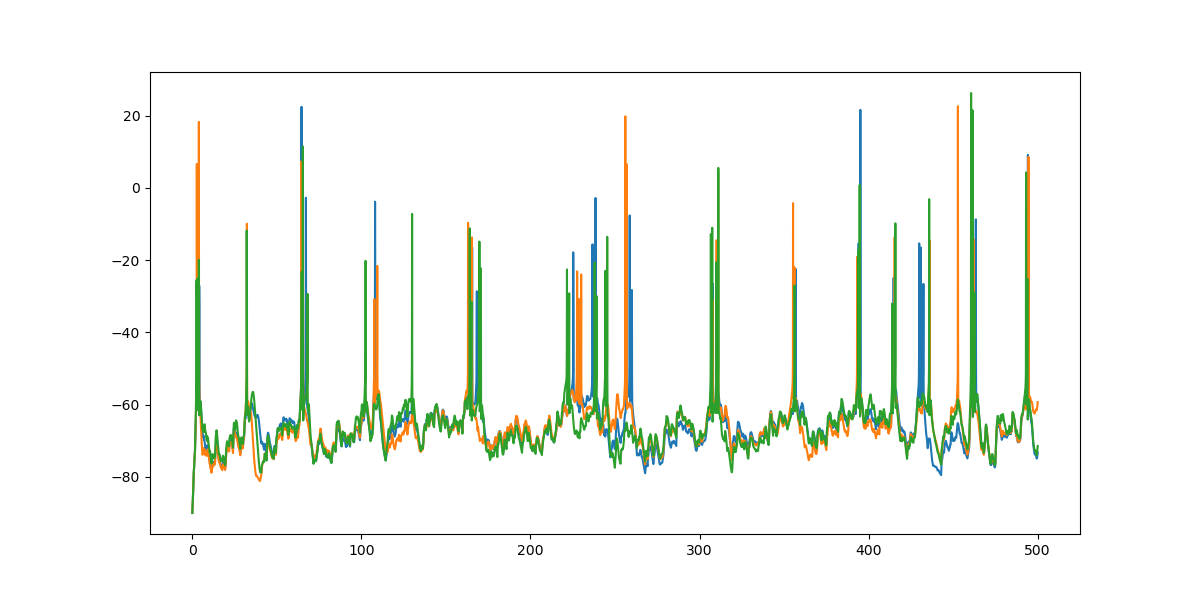

: 

In [18]:
import shutil
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.stats import pearsonr

# Adjust the parameters and initialize the cell structure here
root_path = parameters.path
FI_paths = []
parameters.h_tstop = 5000
parameters.h_i_duration = 1950
parameters.h_i_delay = 50
# amps = np.arange(-2, 2.1, 0.2)

# Prepare subplots: one for the somatic injection, another for the nexus injection
fig, axes = plt.subplots(1, 1, figsize=(12, 6))

# Create a CSV file to store the results
csv_file_path = "FI_Curve_Data.csv"
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Cell Name", "Firing Rate (Hz)"])

    # Dictionary to store data for each cell
    cell_data = {}

    for ax in [axes]:
        for cell_name, cell in cells.items():
            firing_rates = []

            parameters.path = root_path + f"/{cell_name}_synapses"
            # os.mkdir(parameters.path)
            # with open(os.path.join(parameters.path, "parameters.pickle"), "wb") as file:
            #     pickle.dump(parameters, file)
            FI_paths.append(parameters.path)

            # Perform simulation
            print(f"simulating {cell_name}")
            sim.simulate(cell, parameters)

            # Read the voltage and spike data
            v = analysis.DataReader.read_data(parameters.path, "v", parameters=parameters)
            soma_spikes = analysis.DataReader.read_data(parameters.path, "soma_spikes", parameters=parameters)

            # Calculate the firing rate
            firing_rate = len(soma_spikes[0]) / (parameters.h_tstop / 1000)
            firing_rates.append(firing_rate)

            # Write the results to the CSV file
            writer.writerow([cell_name, firing_rate])

            # Store the data for later analysis
            cell_data[cell_name] = v[0]

            label = cell_name
            ax.plot(np.arange(0, len(v[0])) * parameters.h_dt, v[0], label=parameters.path)

        ax.set_title(cell_name)
        ax.set_xlabel('Time')
        ax.set_ylabel('Somatic Vm')
        # ax.set_xlim(0,2)
        ax.legend()

# Display the plots
plt.tight_layout()

# Save the figure to the current directory
plt.savefig("Synapses_Vm_no_mapping.png")  # You can specify other formats like 'pdf' by changing the file extension

plt.show()

# Clean up temporary directories
for FI_path in FI_paths:
    shutil.rmtree(FI_path)

# Compute correlations with the "Complex Cell" data
complex_cell_data = cell_data.get("Complex")
correlations = {}
if complex_cell_data is not None:
    for cell_name, data in cell_data.items():
        if cell_name != "Complex":
            correlation, _ = pearsonr(complex_cell_data, data)
            correlations[cell_name] = correlation

# Print correlations
for cell_name, correlation in correlations.items():
    print(f"Correlation between Complex Cell and {cell_name}: {correlation}")

# Optionally, store the data and correlations in a file
with open("Cell_Data_and_Correlations.pkl", "wb") as file:
    pickle.dump({"cell_data": cell_data, "correlations": correlations}, file)
